## Load necessary packages and definitions

In [51]:
# load packages
import pandas as pd
import statsmodels.tsa.stattools as stats
import statsmodels.graphics.tsaplots as sg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sys
from datetime import datetime
import numpy as np
from Swing import Swing
from Swing.util.Evaluator import Evaluator
import numpy as np

import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

sys.path.append("../pipelines")
import Pipelines as tdw

def get_experiment_list(filename):
    # load files
    timecourse = pd.read_csv(filename, sep="\t")
    # divide into list of dataframes
    experiments = []
    for i in range(0,85,21):
        experiments.append(timecourse.ix[i:i+20])
    #reformat
    for idx,exp in enumerate(experiments):
        exp = exp.set_index('Time')
        experiments[idx]=exp
    return(experiments)

## Run network inference with Swing


In [52]:
data_folder = "/projects/p20519/roller_output/optimizing_window_size/RandomForest/insilico_size10_1/"

output_path = "/home/jjw036/Roller/insilico_size10_1"

current_time = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')
save_path = ('./window_size_selection_swing_results.pickle')

data_folder = "../output/insilico_size10_1"
file_path = "../data/dream4/insilico_size10_1_timeseries.tsv"
run_params = {'data_folder': data_folder,
              'file_path':file_path,
              'td_window':10,
              'min_lag':1,
              'max_lag':3,
              'n_trees':10,
              'permutation_n':10,
              'lag_method':'mean_mean',
              'calc_mse':False,
              'bootstrap_n':100,
              'n_trials':1,
              'run_time':current_time,
              'sort_by':'adj',
              'iterating_param':'td_window',
              }

try:
    tdr = pd.read_pickle(save_path)
except:
    roc,pr, tdr = tdw.get_td_stats(**run_params)
    pd.to_pickle(tdr, save_path)

Running permutation on window 3...
Running permutation on window 4...
Running permutation on window 5...
Running permutation on window 6...
Running permutation on window 7...
Running permutation on window 8...
Running permutation on window 9...
Running permutation on window 10...
Running permutation on window 11...
Compiling all model edges...
[DONE]
Lumping edges...
[DONE]

/Users/jfinkle/Documents/Northwestern/MoDyLS/Python/Roller/Swing/Swing.py:564: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  current_df.sort(['adj_imp'], ascending=False, inplace=True)
/Users/jfinkle/Documents/Northwestern/MoDyLS/Python/Roller/Swing/Swing.py:692: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=False, inplace=True)



Calculating adj edge importance...
[DONE]
90
Scoring model...
[DONE]
0.808888888889
0.466155561295


In [54]:
#list of nodes = G1..G10
nodes = ['G'+str(x) for x in range(1,11)]
#convert edge list to list of tuples
edges = pd.read_csv("../data/dream4/insilico_size10_1_goldstandard.tsv",sep="\t",header=None)
edges = edges[edges[2] > 0]
edges=edges[edges.columns[0:2]]
edges = [tuple(x) for x in edges.values]
G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 50


G.add_nodes_from(nodes)
G.add_edges_from(edges)
try:
    draw(G)
except:
    pass

In [55]:
## Loading baseline SWING results (uniform windowing)
current_gold_standard = file_path.replace("timeseries.tsv","goldstandard.tsv")
evaluator = Evaluator(current_gold_standard, '\t')
true_edges = evaluator.gs_flat.tolist()
print(true_edges)

[('G1', 'G2'), ('G1', 'G3'), ('G1', 'G4'), ('G1', 'G5'), ('G3', 'G4'), ('G3', 'G7'), ('G4', 'G3'), ('G6', 'G2'), ('G7', 'G3'), ('G7', 'G4'), ('G8', 'G2'), ('G8', 'G6'), ('G9', 'G10'), ('G10', 'G3'), ('G10', 'G4')]


In [56]:
#tdr.edge_dict
final_edge_list = tdr.make_sort_df(tdr.edge_dict, sort_by=run_params['sort_by'])
final_edge_list['Correct'] = final_edge_list['regulator-target'].isin(edges)
pd.set_option('display.height', 500)
final_edge_list

Calculating adj edge importance...
[DONE]
height has been deprecated.



/Users/jfinkle/Documents/Northwestern/MoDyLS/Python/Roller/Swing/Swing.py:692: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=False, inplace=True)


,regulator-target,adj_importance,Correct
0,"(G1, G5)",0.12119,True
1,"(G8, G6)",0.09949,True
2,"(G9, G10)",0.09513,True
3,"(G7, G3)",0.08175,True
4,"(G7, G2)",0.06743,False
5,"(G6, G8)",0.06407,False
6,"(G5, G10)",0.05869,False
7,"(G5, G1)",0.05769,False
8,"(G5, G9)",0.05469,False
9,"(G9, G3)",0.04709,False


In [57]:
experiments=get_experiment_list("../data/dream4/insilico_size10_1_timeseries.tsv")

## G1->G5 is the highest rank that is true. Let's find out why

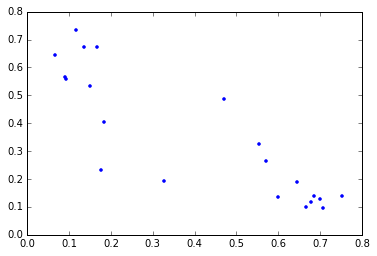

In [58]:
edge_distribution = tdr.full_edge_list[(tdr.full_edge_list['Parent']=='G1')&(tdr.full_edge_list['Child']=='G5')]
pd.set_option('display.width', 500)
# print(edge_distribution)
fig = plt.figure()

ax1 = plt.plot(experiments[0]['G1'], experiments[0]['G5'], '.')

In [59]:
print('corr=',np.corrcoef(experiments[0]['G1'], experiments[0]['G5'])[0,1])

corr= -0.861585851386


corr= -0.861585851386
corr= -0.433215730491
corr= -0.827371618791
corr= -0.0744039128196
corr= -0.17496527711


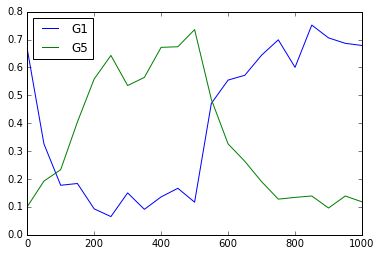

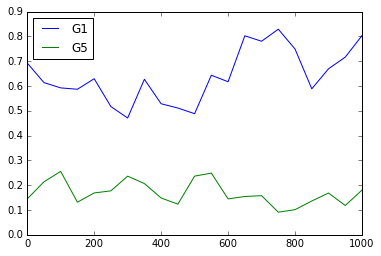

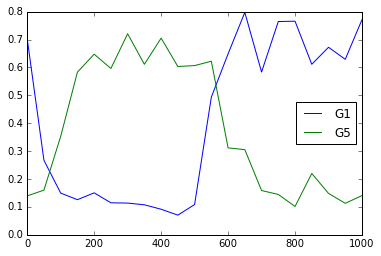

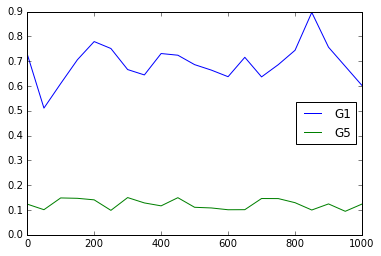

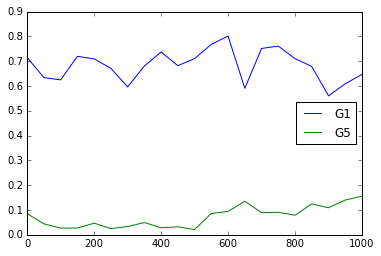

In [60]:
times = experiments[0].index.values
for ii in range(len(experiments)):
    plt.figure()
    plt.plot(times, experiments[ii]['G1'], times, experiments[ii]['G5'])
    plt.legend(['G1', 'G5'], loc='best')
    print('corr=',np.corrcoef(experiments[ii]['G1'], experiments[ii]['G5'])[0,1])

corr= -0.923985406115
corr= -0.908673217226
corr= -0.902848793982
corr= -0.897781618385
corr= -0.896777708022
corr= -0.880900122856
corr= -0.841938700311
corr= -0.794825287924
corr= -0.531013107342


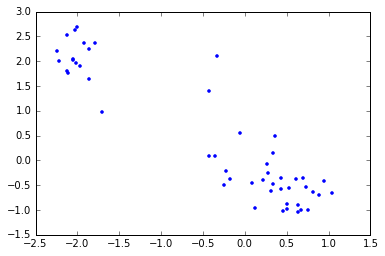

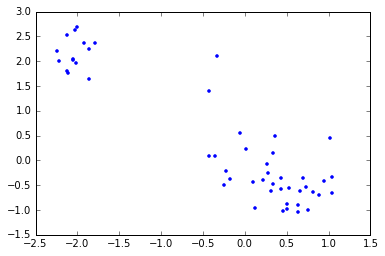

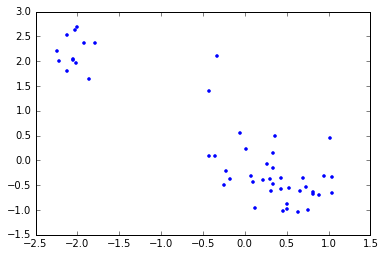

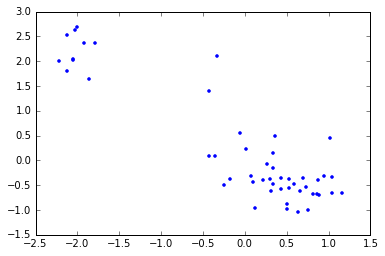

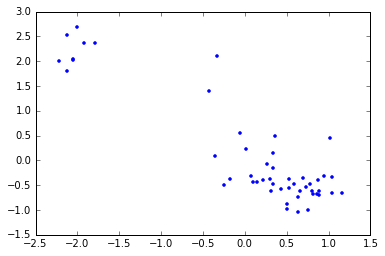

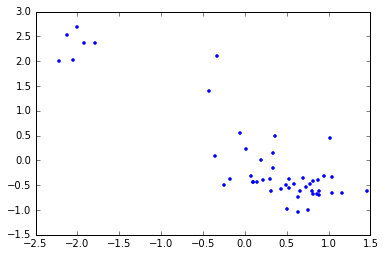

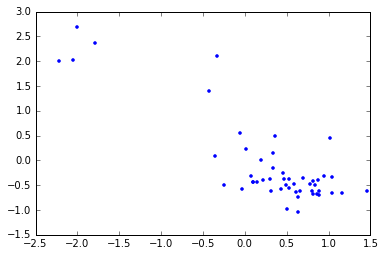

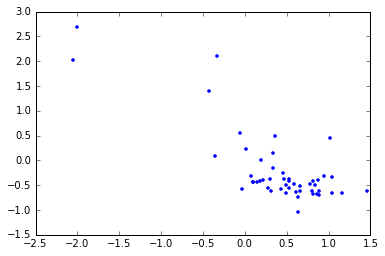

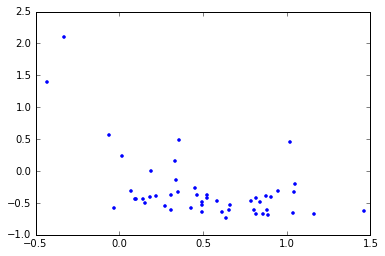

In [61]:
corr_list = []
for win in tdr.window_list:
    plt.figure()
    plt.plot(win.data['G1'], win.data['G5'], '.')
    current_corr = np.corrcoef(win.data['G1'], win.data['G5'])[0,1]
    corr_list.append(current_corr)
    print('corr=',current_corr)

In [62]:
print('overall corr=',np.corrcoef(tdr.norm_data['G1'], tdr.norm_data['G5'])[0,1])
print('median_win_corr=', np.median(corr_list))
print('avg_win_corr=', np.mean(corr_list))

overall corr= -0.859287373846
median_win_corr= -0.896777708022
avg_win_corr= -0.842082662463


In [63]:
overall_corr = np.corrcoef(tdr.norm_data.iloc[:,1:].T)
np.fill_diagonal(overall_corr, 0)
gene_list = tdr.gene_list
correlation_scores = pd.DataFrame(np.tril(overall_corr), index=gene_list, columns=gene_list)
parent_index = range(correlation_scores.shape[0])
child_index = range(correlation_scores.shape[1])
a, b = np.meshgrid(parent_index, child_index)
df = pd.DataFrame()
df['Parent'] = gene_list[a.flatten()]
df['Child'] = gene_list[b.flatten()]
df['Corr'] = correlation_scores.values.flatten()
df['Abs_corr'] = np.abs(correlation_scores.values.flatten())
df = df[df['Corr']!=0]
df.sort('Abs_corr', ascending=False, inplace=True)
df['regulator-target']= list(zip(df['Parent'], df['Child']))
df['flipped'] = [(e[1], e[0]) for e in df['regulator-target'].values]
df['Correct'] = (df['regulator-target'].isin(edges) | df['flipped'].isin(edges))
print(df[0:30])
print(final_edge_list[0:30])

   Parent Child     Corr  Abs_corr regulator-target    flipped Correct
40     G1    G5 -0.85929   0.85929         (G1, G5)   (G5, G1)    True
75     G6    G8 -0.74812   0.74812         (G6, G8)   (G8, G6)    True
86     G7    G9  0.58607   0.58607         (G7, G9)   (G9, G7)   False
98     G9   G10  0.58205   0.58205        (G9, G10)  (G10, G9)    True
62     G3    G7  0.47998   0.47998         (G3, G7)   (G7, G3)    True
10     G1    G2  0.47121   0.47121         (G1, G2)   (G2, G1)    True
61     G2    G7 -0.45761   0.45761         (G2, G7)   (G7, G2)   False
74     G5    G8 -0.42993   0.42993         (G5, G8)   (G8, G5)   False
63     G4    G7  0.42709   0.42709         (G4, G7)   (G7, G4)    True
54     G5    G6  0.42348   0.42348         (G5, G6)   (G6, G5)   False
21     G2    G3 -0.41898   0.41898         (G2, G3)   (G3, G2)   False
32     G3    G4  0.41641   0.41641         (G3, G4)   (G4, G3)    True
70     G1    G8  0.41365   0.41365         (G1, G8)   (G8, G1)   False
53    

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [64]:
print(final_edge_list[~final_edge_list['Correct']][:10])
true_edges
# G5,G10 - unknown why highly ranked
# G6, G8 - This is a flipped edge. The right direction is inferred with higher rank. highly correlated variables. 
# G9, G3 - indirect edge through G10. Moderate correlation
# G5, G1 - This is a flipped edge. The right direction is inferred with higher rank. highly correlated variables. 
# G2, G6 - This is a flipped edge. The right direction has a slightly lower rank. not well correlated variables.
# G7, G2 - Moderate correlation. Maybe some indirect connection through G3, G4, G1, but seems tenuous
# G5, G9 - Moderate correlation. unknown why highly ranked
# G8, G4 - Moderate correlation. unknown why highly ranked
# G5, G3 - Moderate correlation. Share upstream regulator, G1
# G2, G8 - This is a flipped edge. The right direction is inferred with higher rank. Moderate correlation


   regulator-target  adj_importance Correct
4          (G7, G2)         0.06743   False
5          (G6, G8)         0.06407   False
6         (G5, G10)         0.05869   False
7          (G5, G1)         0.05769   False
8          (G5, G9)         0.05469   False
9          (G9, G3)         0.04709   False
12         (G2, G6)         0.03655   False
13         (G7, G1)         0.03225   False
14         (G2, G8)         0.03048   False
16         (G7, G5)         0.02609   False


[('G1', 'G2'),
 ('G1', 'G3'),
 ('G1', 'G4'),
 ('G1', 'G5'),
 ('G3', 'G4'),
 ('G3', 'G7'),
 ('G4', 'G3'),
 ('G6', 'G2'),
 ('G7', 'G3'),
 ('G7', 'G4'),
 ('G8', 'G2'),
 ('G8', 'G6'),
 ('G9', 'G10'),
 ('G10', 'G3'),
 ('G10', 'G4')]

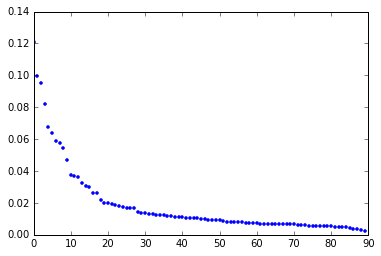

In [66]:
tpr, fpr, auroc = evaluator.calc_roc(df)
plt.plot(final_edge_list['adj_importance'], '.')

In [81]:
print(df[df['regulator-target']==('G5', 'G10')])
tdr.full_edge_list[tdr.full_edge_list['Edge']==('G1', 'G5')]

   Parent Child    Corr  Abs_corr regulator-target    flipped Correct
94     G5   G10 0.24621   0.24621        (G5, G10)  (G10, G5)   False


,Parent,Child,Importance,P_window,C_window,p_value,adj_imp,Rank,Edge,Lag
5,G1,G5,0.20351,1,3,0.00001,0.20351,5,"(G1, G5)",2
27,G1,G5,0.09329,2,3,0.00257,0.09305,27,"(G1, G5)",1
49,G1,G5,0.07729,0,3,0.20514,0.06144,49,"(G1, G5)",3
315,G1,G5,0.12767,3,4,0.06707,0.11911,15,"(G1, G5)",1
474,G1,G5,0.00872,2,4,0.44202,0.00487,174,"(G1, G5)",2
599,G1,G5,0.00001,1,4,0.11857,0.00001,299,"(G1, G5)",3
623,G1,G5,0.10670,2,5,0.00677,0.10598,23,"(G1, G5)",3
681,G1,G5,0.02058,4,5,0.53360,0.00960,81,"(G1, G5)",1
750,G1,G5,0.01139,3,5,0.53749,0.00527,150,"(G1, G5)",2
903,G1,G5,0.26907,4,6,0.00000,0.26907,3,"(G1, G5)",2


0
corr= -0.876290765402
1
corr= -0.357682991229
2
corr= 0.311353316749
3
corr= -0.324109660074
4
corr= -0.0757701668129


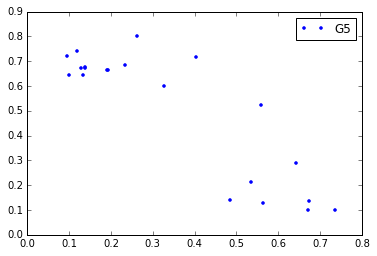

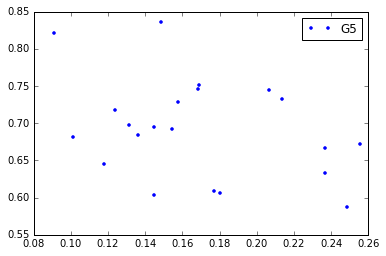

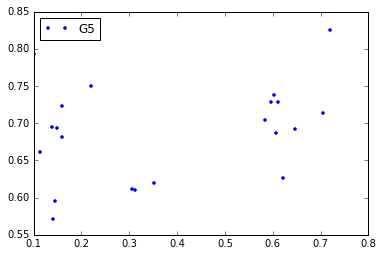

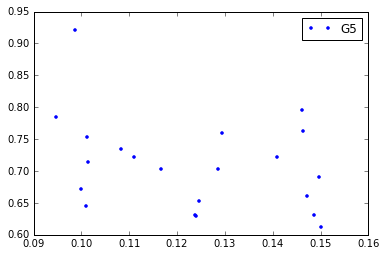

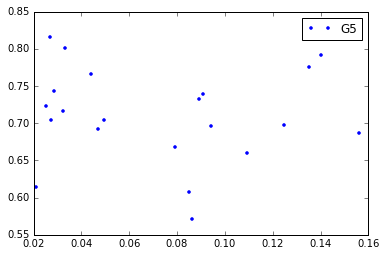

In [80]:
# G5 - G10 is a weird edge. Let's see what is going on
for ii in range(len(experiments)):
    print(ii)
    plt.figure()
    plt.plot(experiments[ii]['G5'], experiments[ii-1]['G10'], '.')
    plt.legend(['G5', 'G10'], loc='best')
    print('corr=',np.corrcoef(experiments[ii]['G5'], experiments[ii-1]['G10'])[0,1])

0
corr= 0.235697801628
1
corr= 0.472689615544
2
corr= 0.456263825814
3
corr= 0.405124612315
4
corr= 0.317019654086
5
corr= 0.312298155028
6
corr= 0.269555874958
7
corr= 0.175147934803
8
corr= 0.0824612271865


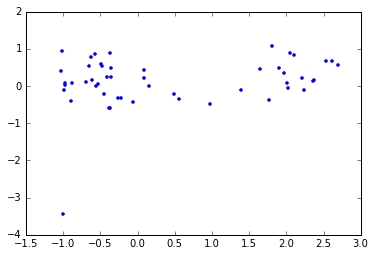

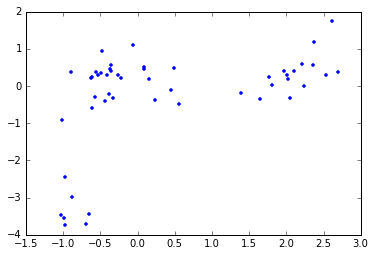

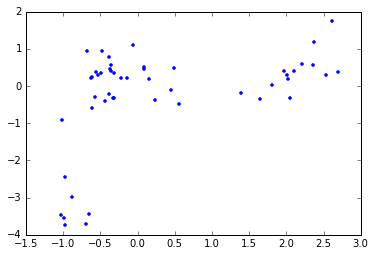

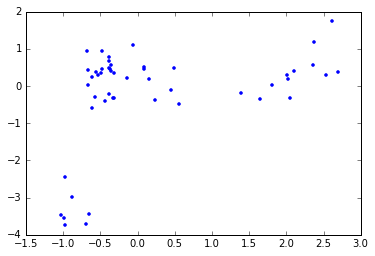

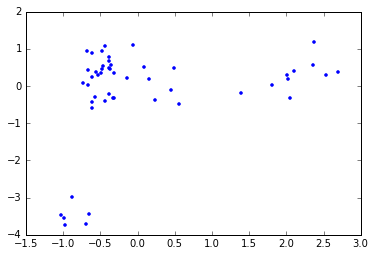

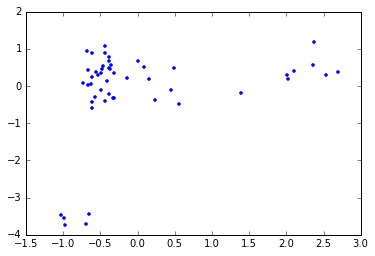

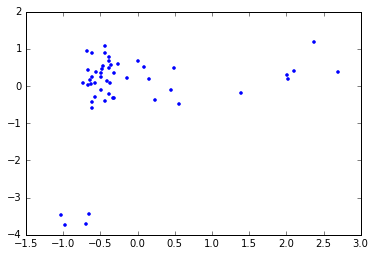

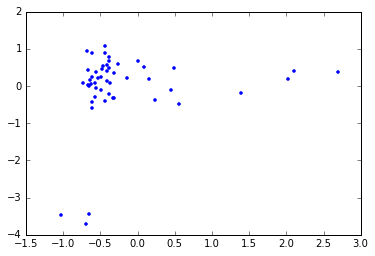

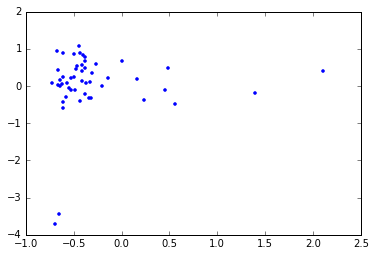

In [82]:
corr_list = []
for ii, win in enumerate(tdr.window_list):
    print(ii)
    plt.figure()
    plt.plot(win.data['G5'], tdr.window_list[ii-1].data['G10'], '.')
    current_corr = np.corrcoef(win.data['G5'], tdr.window_list[ii-1].data['G10'])[0,1]
    corr_list.append(current_corr)
    print('corr=',current_corr)

In [72]:
tdr.window_list[5].edge_importance.index

Index(['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10'], dtype='object', name='Child')